In [4]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt

In [2]:
cords = np.array([[1, 2], [3, 4], [5, 6]])

def coord_fun(coords):
    x, y = coords[0], coords[1]
    coords[0] = 60 - y
    coords[1] = 20 - x
    return coords

np.apply_along_axis(coord_fun, 1, cords)

array([[58, 19],
       [56, 17],
       [54, 15]])

In [3]:
cords.shape

(3, 2)

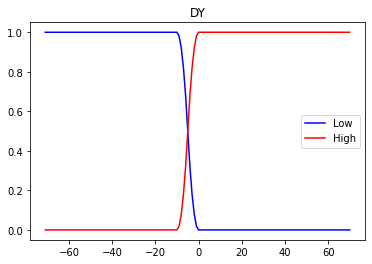

In [32]:
dy_range = np.arange(-(72-1), 72-1)

dy_high = fuzz.smf(dy_range, -10, 0)
dy_low = 1 - dy_high

fig = plt.figure()
plt.plot(dy_range, dy_low, 'b', linewidth=1.5, label='Low')
plt.plot(dy_range, dy_high, 'r', linewidth=1.5, label='High')
plt.title('DY')
plt.legend()

71

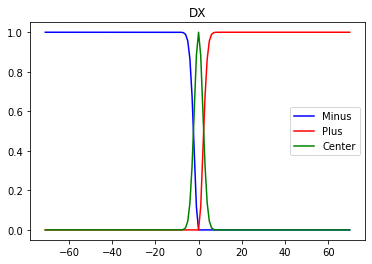

In [49]:
dx_range = np.arange(-(72-1), 72-1)

zero_index = np.where(dx_range==0)[0][0]

dx_center = fuzz.gaussmf(dx_range, 0, 2)
dx_plus = 1 - dx_center
dx_plus[0:zero_index] = 0
dx_minus = 1 - dx_center
dx_minus[zero_index:] = 0

fig = plt.figure()
plt.plot(dx_range, dx_minus, 'b', linewidth=1.5, label='Minus')
plt.plot(dx_range, dx_plus, 'r', linewidth=1.5, label='Plus')
plt.plot(dx_range, dx_center, 'g', linewidth=1.5, label="Center")
plt.title('DX')
plt.legend()

In [ ]:
# if dx is low or dy is low -> dir = left

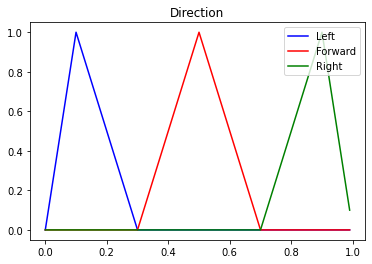

In [76]:
dir_range = np.arange(0, 1 , 0.01)

zero_index = np.where(dir_range==0.5)[0][0]

dir_forward = fuzz.trimf(dir_range, [0.3, 0.5, 0.7])
dir_left = fuzz.trimf(dir_range, [0, 0.1, 0.3])
# dir_left[0:zero_index] = 0
# dir_right = 1 - dir_forward
dir_right = fuzz.trimf(dir_range, [0.7, 0.9, 1.])

fig = plt.figure()
plt.plot(dir_range, dir_left, 'b', linewidth=1.5, label='Left')
plt.plot(dir_range, dir_forward, 'r', linewidth=1.5, label='Forward')
plt.plot(dir_range, dir_right, 'g', linewidth=1.5, label="Right")
plt.title('Direction')
plt.legend()

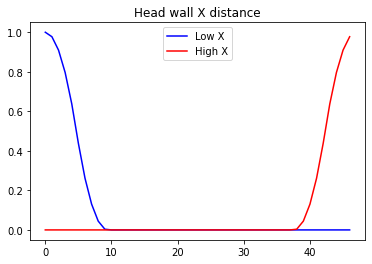

In [73]:
maximum = 71 # 47
maximum = 47
head_x_range = np.arange(0, maximum)

wall_x_high = fuzz.smf(head_x_range, maximum-maximum*0.2, maximum)
wall_x_low = 1 - fuzz.smf(head_x_range, 0, maximum*0.2)

fig = plt.figure()
plt.plot(head_x_range, wall_x_low, 'b', linewidth=1.5, label='Low X')
plt.plot(head_x_range, wall_x_high, 'r', linewidth=1.5, label='High X')
plt.title('Head wall X distance')
plt.legend()

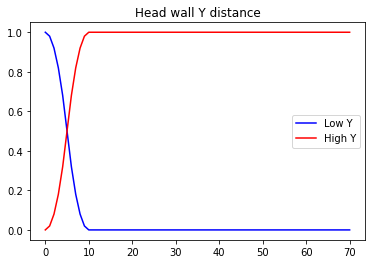

In [75]:
head_y_range = np.arange(0, 71)

# wall_y_high = fuzz.smf(head_y_range, 15, 71)
wall_y_low = 1 - fuzz.smf(head_y_range, 0, 10)
wall_y_high = 1 - wall_y_low
fig = plt.figure()
plt.plot(head_y_range, wall_y_low, 'b', linewidth=1.5, label='Low Y')
plt.plot(head_y_range, wall_y_high, 'r', linewidth=1.5, label='High Y')
plt.title('Head wall Y distance')
plt.legend()

0.00010657539522945332


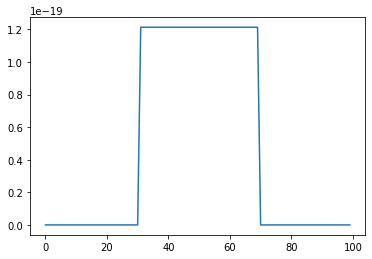

In [12]:
dir_range = np.arange(0, 1, 0.01)
dir_forward = fuzz.trimf(dir_range, [0.3, 0.5, 0.7])
dir_left = fuzz.trimf(dir_range, [0, 0.1, 0.3])
dir_right = fuzz.trimf(dir_range, [0.7, 0.9, 1.])
rules = {'dy_low': 1.0, 'dy_high': 0.0, 'dx_low': 0.0, 'dx_center': 1.213563668125796e-19, 'dx_high': 1.0, 'wall_x_high': 0.0, 'wall_x_low': 0.4382073336351291, 'wall_y_high': 1.0, 'wall_y_low': 0.0}
out_activations = []
rule1 = np.fmin(rules["dy_low"], rules["dx_center"])
out_activations.append(np.fmin(rule1, dir_forward))

rule2 = np.fmin(rules["dy_high"], rules["dx_low"])
out_activations.append(np.fmin(rule2, dir_left))

rule3 = np.fmin(rules["dy_high"], rules["dx_high"])
out_activations.append(np.fmin(rule3, dir_right))

rule4 = np.fmin(rules["wall_y_low"], rules["wall_x_low"])
out_activations.append(np.fmin(rule4, dir_right))

rule5 = np.fmin(rules["wall_y_low"], rules["wall_x_high"])
out_activations.append(np.fmin(rule5, dir_left))

aggregated = np.fmax(out_activations[0], out_activations[1])
for activation in out_activations[2:]:
    aggregated = np.fmax(aggregated, activation)
out = fuzz.centroid(dir_range, aggregated)
plt.plot(aggregated)
print(out)

In [31]:
fuzz.trimf(dir_range, [0, 0.1, 1]).max()

1.0

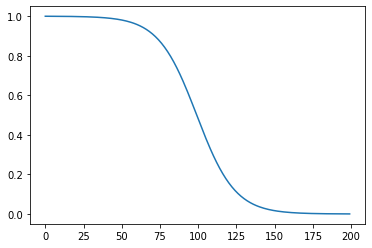

In [52]:
plt.plot(fuzz.sigmf(np.arange(0, 2, 0.01), 1, 8)[::-1])

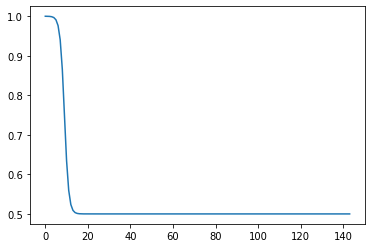

In [56]:
dist_max = 72
dist_range = np.arange(0, dist_max * 2)
plt.plot(fuzz.sigmf(dist_range, dist_max * 2 - 10, 1)[::-1] * 0.5 + 0.5)

In [2]:
def count_obstacles(board, orientation):
    snake_position = list(zip(*np.where(board == 1)))[0]
    kernel = np.array(
        [
            [0.05, 0.1, 0.05],
            [0.1, 0.2, 0.1],
            [0.2, 1., 0.2]
        ]
    ).T
    if orientation == 'LEFT':
        kernel = np.flip(kernel.T, (1))
    elif orientation == 'RIGHT':
        kernel = np.flip(kernel.T, (0))
    box_size = 3
    mid_offset = (box_size - 1) // 2
    if orientation == 'UP':
        bounding_coords = (np.array((-mid_offset, -box_size)), np.array((mid_offset + 1, 0)))
    elif orientation == 'LEFT':
        bounding_coords = (np.array((-box_size, -mid_offset)), np.array((0, mid_offset + 1)))
    elif orientation == 'RIGHT':
        bounding_coords = (np.array((1, -mid_offset)), np.array((box_size + 1, mid_offset + 1)))
    obstacles = (board == 2)[
        np.maximum(snake_position[0] + bounding_coords[0][0], 0):snake_position[0] + bounding_coords[1][0],
        np.maximum(snake_position[1] + bounding_coords[0][1], 0):snake_position[1] + bounding_coords[1][1]
    ]
    if (np.array(obstacles.shape) < box_size).any():
        new_obstacles = np.ones_like(kernel)
        if orientation == 'UP':
            new_obstacles[
                :obstacles.shape[0],
                box_size - obstacles.shape[1]:
            ] = obstacles
        elif orientation == 'LEFT':
            new_obstacles[
                box_size - obstacles.shape[0]:,
                box_size - obstacles.shape[1]:
            ] = obstacles
        elif orientation == 'RIGHT':
            new_obstacles[
                :obstacles.shape[0],
                box_size - obstacles.shape[1]:
            ] = obstacles
        obstacles = new_obstacles
    return (obstacles * kernel).sum()

In [9]:
test_board = np.array([
    [0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0],
    [0,0,0,1,0,0,0],
    [0,0,2,0,2,0,0],
    [0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0],
]).T

count_obstacles(test_board, "UP")

0.2

In [72]:
kernel = np.array(
        [
            [0.05, 0.1, 0.05],
            [0.1, 0.2, 0.1],
            [0.2, 1., 0.2]
        ]
    ).T

In [77]:
kernel

array([[0.05, 0.1 , 0.2 ],
       [0.1 , 0.2 , 1.  ],
       [0.05, 0.1 , 0.2 ]])

In [80]:
np.flip(kernel.T, (1))

array([[0.05, 0.1 , 0.05],
       [0.1 , 0.2 , 0.1 ],
       [0.2 , 1.  , 0.2 ]])